

# Linear Regression
```
Y = a + mx
```


### Linear Regression (standarized)

In [224]:
import pandas as pd 
df = pd.read_excel('sales.xlsx')
df

,n_year,year,sales
0,1,2010,200000
1,2,2011,350000
2,3,2012,275000
3,4,2013,450000
4,5,2014,370000
5,6,2015,520000


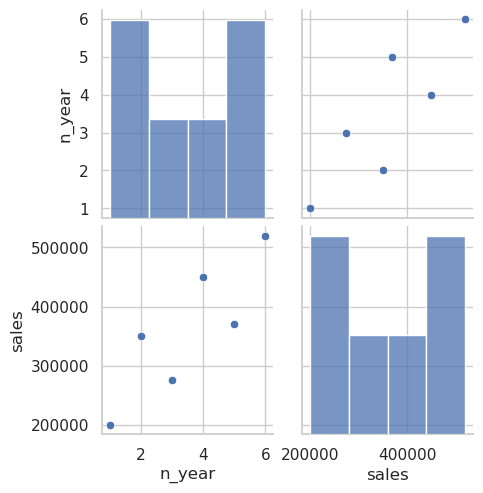

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['n_year', 'sales']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

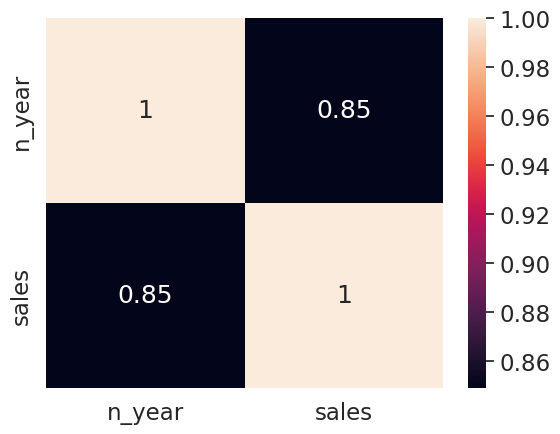

In [226]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [227]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['n_year'].values.reshape(-1, 1)
Y = df['sales'].values.reshape(-1, 1)

# Standardization involves subtracting the mean of each column from each value
# in that column and then dividing by the standard deviation of the column. 
# This ensures that each column has zero mean and unit variance.
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(Y)

slr = LinearRegression()
model_std = slr.fit(X_std, Y_std)

Text(0.5, 0, 'Year')

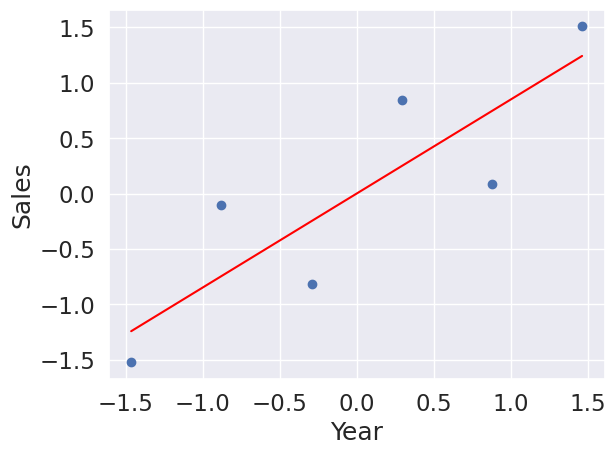

In [228]:
plt.scatter(X_std, Y_std)
plt.plot(X_std, slr.predict(X_std), color='red')
plt.ylabel('Sales')
plt.xlabel('Year')

In [229]:
n_year = 7
sales_std = sc_x.transform(np.array([n_year]).reshape(-1,1))
# sales_std = np.array([n_year]).reshape(-1,1)

print('la cantidad de ventas para el periodo 7 (anio 2016) es de ', sc_y.inverse_transform(slr.predict(sales_std)))
# print('la cantidad de ventas para el periodo 7 (anio 2016) es de ', slr.predict(sales_std))

la cantidad de ventas para el periodo 7 (anio 2016) es de  [[544333.33333333]]


In [230]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

r_sq = model_std.score(X_std, Y_std)
mse = mean_squared_error(X_std, Y_std)
mae = mean_absolute_error(X_std, Y_std)

intercept =  model_std.intercept_[0]
coef = model_std.coef_[0]

print(f"coefficient of determination R^2: {r_sq}")
print(f"Mean squared errror: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"\ninterception: {intercept}")
print(f"Model coef: {coef[0]}")

print('\n======== Standarized equation ========')
print(f"Y = {intercept:.2f} + {coef[0]:.2f}X")

coefficient of determination R^2: 0.7209624323094628
Mean squared errror: 0.30
Mean absolute error: 0.46

interception: 1.794525663885509e-16
Model coef: 0.8490950667089423

======== Standarized equation ========
Y = 0.00 + 0.85X


### Linear Regression (original data)

In [231]:
import pandas as pd
df = pd.read_excel('sales.xlsx')
df

,n_year,year,sales
0,1,2010,200000
1,2,2011,350000
2,3,2012,275000
3,4,2013,450000
4,5,2014,370000
5,6,2015,520000


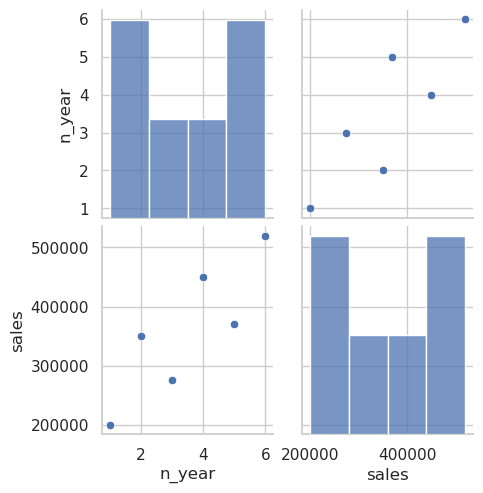

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['n_year', 'sales']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

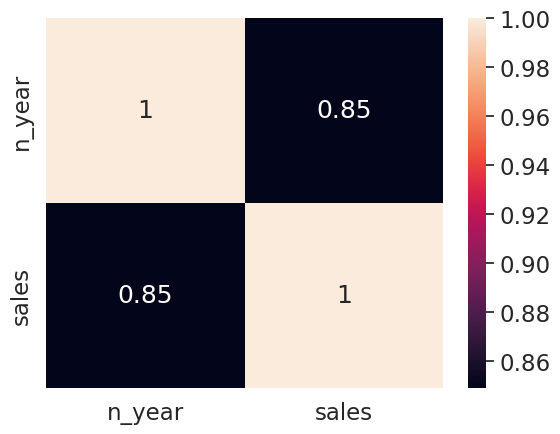

In [233]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [234]:
from sklearn.linear_model import LinearRegression

X = df['n_year'].values.reshape(-1, 1)
Y = df['sales'].values.reshape(-1, 1)
lr = LinearRegression()
model = lr.fit(X, Y)

Text(0.5, 0, 'n_Year')

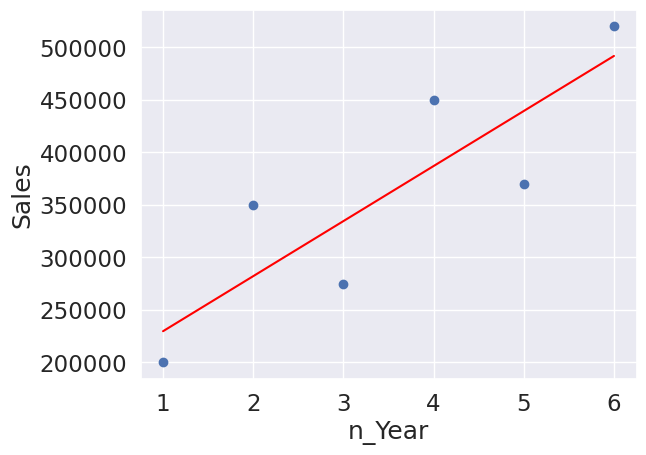

In [235]:
plt.scatter(X, Y)
plt.plot(X, lr.predict(X), color='red')
plt.ylabel('Sales')
plt.xlabel('n_Year')

In [236]:
n_year = 7
sales = lr.predict(np.array(n_year).reshape(-1, 1))

print('la cantidad de ventas para el periodo 7 (anio 2016) es de ', sales)

la cantidad de ventas para el periodo 7 (anio 2016) es de  [[544333.33333333]]


In [237]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

r_sq = lr.score(X, Y)
mse = mean_squared_error(X, Y)
mae = mean_absolute_error(X, Y)
intercept = lr.intercept_[0]
coef = lr.coef_[0]

print(f"coefficient of determination R^2: {r_sq}")
print(f"Mean squared errror: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"\ninterception: {intercept:.2f}")
print(f"Model coef: {coef[0]:.2f}")

print('\n======== Original equation ========')
print(f"Y = {intercept:.2f} + {coef[0]:.2f}X")

coefficient of determination R^2: 0.720962432309463
Mean squared errror: 141318001681.83
Mean absolute error: 360829.83

interception: 177333.33
Model coef: 52428.57

======== Original equation ========
Y = 177333.33 + 52428.57X


In [238]:
# import statsmodels.api as sm
# ols_model = sm.OLS(Y, sm.add_constant(X)).fit()
# print(ols_model.summary())


# Exponential Regression
```
Ln(y) = Ln(a) + Ln(b)X
```

In [239]:
import pandas as pd
df = pd.read_excel('sales.xlsx')
df

,n_year,year,sales
0,1,2010,200000
1,2,2011,350000
2,3,2012,275000
3,4,2013,450000
4,5,2014,370000
5,6,2015,520000


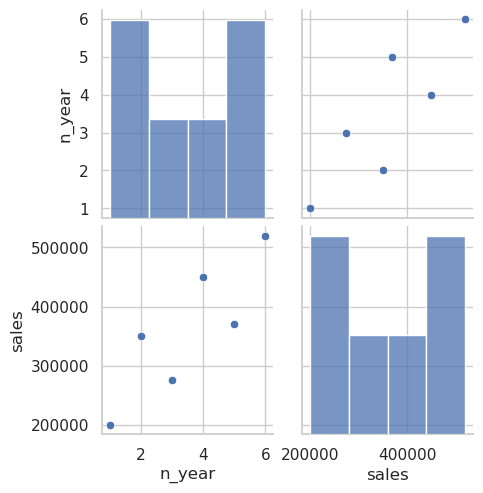

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", context="notebook")
cols = ['n_year', 'sales']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

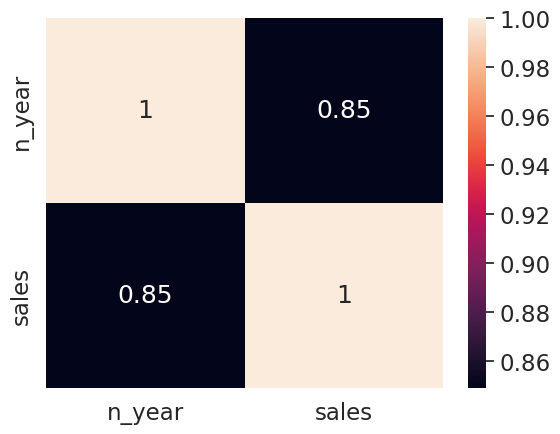

In [241]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [242]:
from sklearn.linear_model import LinearRegression

X = np.array(df['n_year']).reshape(-1, 1)
Y = np.array(df['sales'])

log_x = np.log(X)
log_y = np.log(Y)

model = LinearRegression()
model.fit(X, log_y)

LinearRegression()

Text(0.5, 0, 'n_Year')

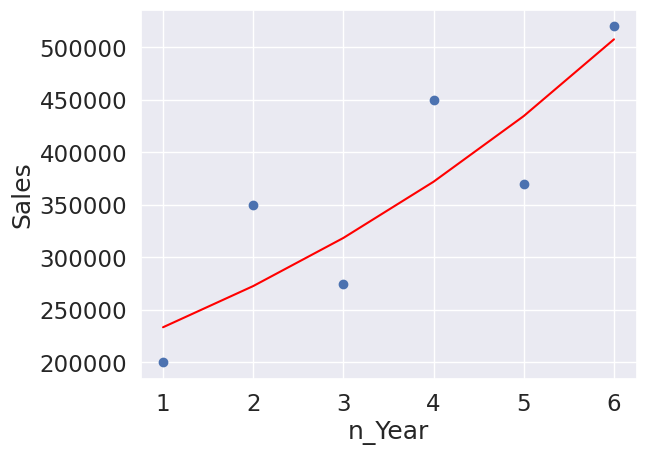

In [243]:
plt.scatter(X, Y)
plt.plot(X, np.exp(model.predict(X)), color='red')
plt.ylabel('Sales')
plt.xlabel('n_Year')


In [244]:
n_year = 7

sales = model.predict(np.array(n_year).reshape(-1, 1))
print(f"la cantidad de ventas para el periodo 7 (anio 2016) es de {np.exp(sales)}")

la cantidad de ventas para el periodo 7 (anio 2016) es de [593047.49951315]


In [245]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

r_sq = model.score(X, log_y)
mse = mean_squared_error(X, np.exp(model.predict(X)))
mae = mean_absolute_error(X, np.exp(model.predict(X)))

intercept = model.intercept_
coef = model.coef_

print(f"coefficient of determination R^2: {r_sq}")
print(f"Mean squared errror: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"\ninterception: {intercept:.5f}")
print(f"Model coef: {coef[0]:.5f}")

print('\n======== Original equation ========')
print(f"Log(Y) = {intercept:.5f} + {coef[0]:.5f}X")

coefficient of determination R^2: 0.7124236279757308
Mean squared errror: 135938963289.53
Mean absolute error: 356566.38

interception: 12.20568
Model coef: 0.15534

======== Original equation ========
Log(Y) = 12.20568 + 0.15534X
